# Random Walk

### Índice
1. [Primeiro caso de teste](#Primeiro-caso-de-teste)<br>
2. [Segundo caso de teste](#Segundo-caso-de-teste)
3. [Terceiro caso de teste](#Terceiro-caso-de-teste)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Primeiro caso de teste

In [2]:
#função fitness
def f(x,y,z):
    return 10 * (x - 1)**2 + 20 * (y - 2)**2 + 30 * (z - 3)**2

def criaPop(tamanho,dim):
    return np.random.uniform(0 , 1 , size = (tamanho,dim))

def converter1(pop):
    lb = [-3,-2,0]
    ub = [3,4,6]
    x = lb[0]+(ub[0]-lb[0])*pop[:,:1]
    y = lb[1]+(ub[1]-lb[1])*pop[:,1:2]
    z = lb[2]+(ub[2]-lb[2])*pop[:,2:]

    #nova população com valores convertidos
    popconv = np.append(x.reshape(-1, 1), y.reshape(-1, 1), axis=1)
    popconv = np.append(popconv, z.reshape(-1, 1), axis=1)
    return popconv

def estagnacao(fitAnt, fitAtual):
    return abs(fitAnt-fitAtual)/fitAtual


In [3]:
#população inicial (primeira geração)
n_pop = 10
dim = 3
pop=criaPop(n_pop,dim)
pop

array([[0.45642744, 0.66766366, 0.76644959],
       [0.0712967 , 0.86786093, 0.77963634],
       [0.12469675, 0.89213515, 0.60650889],
       [0.0864971 , 0.19575439, 0.10819413],
       [0.70507826, 0.94083863, 0.85383686],
       [0.49886002, 0.47461418, 0.6000532 ],
       [0.29049299, 0.20091942, 0.77103141],
       [0.04608959, 0.20259333, 0.61293113],
       [0.55153447, 0.03990031, 0.64695681],
       [0.55677151, 0.49569219, 0.90895169]])

In [4]:
#converter para as faixas do primeiro caso de teste
pop=converter1(pop)
pop

array([[-0.26143533,  2.00598194,  4.59869755],
       [-2.57221982,  3.20716559,  4.67781801],
       [-2.25181949,  3.35281093,  3.63905331],
       [-2.4810174 , -0.82547368,  0.64916477],
       [ 1.23046954,  3.64503179,  5.12302118],
       [-0.00683987,  0.8476851 ,  3.60031918],
       [-1.25704204, -0.7944835 ,  4.62618845],
       [-2.72346248, -0.78444005,  3.6775868 ],
       [ 0.30920683, -1.76059815,  3.88174085],
       [ 0.34062905,  0.97415317,  5.45371012]])

In [5]:
#fitness
pop = np.append(pop,(f(pop[0:,0:1],pop[0:,1:2],pop[0:,2:])).reshape(-1, 1), axis=1)
pop

array([[-2.61435334e-01,  2.00598194e+00,  4.59869755e+00,
         9.25879219e+01],
       [-2.57221982e+00,  3.20716559e+00,  4.67781801e+00,
         2.41204718e+02],
       [-2.25181949e+00,  3.35281093e+00,  3.63905331e+00,
         1.54596922e+02],
       [-2.48101740e+00, -8.25473681e-01,  6.49164770e-01,
         4.46633640e+02],
       [ 1.23046954e+00,  3.64503179e+00,  5.12302118e+00,
         1.89870321e+02],
       [-6.83987369e-03,  8.47685100e-01,  3.60031918e+00,
         4.75053513e+01],
       [-1.25704204e+00, -7.94483500e-01,  4.62618845e+00,
         2.86459815e+02],
       [-2.72346248e+00, -7.84440045e-01,  3.67758680e+00,
         3.07477572e+02],
       [ 3.09206826e-01, -1.76059815e+00,  3.88174085e+00,
         3.10937928e+02],
       [ 3.40629054e-01,  9.74153166e-01,  5.45371012e+00,
         2.06015735e+02]])

In [6]:
#ordenação
pop_ord = pop[pop[0:, -1].argsort()]
pop_ord

array([[-6.83987369e-03,  8.47685100e-01,  3.60031918e+00,
         4.75053513e+01],
       [-2.61435334e-01,  2.00598194e+00,  4.59869755e+00,
         9.25879219e+01],
       [-2.25181949e+00,  3.35281093e+00,  3.63905331e+00,
         1.54596922e+02],
       [ 1.23046954e+00,  3.64503179e+00,  5.12302118e+00,
         1.89870321e+02],
       [ 3.40629054e-01,  9.74153166e-01,  5.45371012e+00,
         2.06015735e+02],
       [-2.57221982e+00,  3.20716559e+00,  4.67781801e+00,
         2.41204718e+02],
       [-1.25704204e+00, -7.94483500e-01,  4.62618845e+00,
         2.86459815e+02],
       [-2.72346248e+00, -7.84440045e-01,  3.67758680e+00,
         3.07477572e+02],
       [ 3.09206826e-01, -1.76059815e+00,  3.88174085e+00,
         3.10937928e+02],
       [-2.48101740e+00, -8.25473681e-01,  6.49164770e-01,
         4.46633640e+02]])

In [7]:
#50% melhores
melhor_pop_inicial = pop_ord[0:int(n_pop/2),:]
melhor_pop_inicial

array([[-6.83987369e-03,  8.47685100e-01,  3.60031918e+00,
         4.75053513e+01],
       [-2.61435334e-01,  2.00598194e+00,  4.59869755e+00,
         9.25879219e+01],
       [-2.25181949e+00,  3.35281093e+00,  3.63905331e+00,
         1.54596922e+02],
       [ 1.23046954e+00,  3.64503179e+00,  5.12302118e+00,
         1.89870321e+02],
       [ 3.40629054e-01,  9.74153166e-01,  5.45371012e+00,
         2.06015735e+02]])

In [8]:
#contagem de população estagnada
cont = 0
delta = 0.01

In [27]:
sem_evoluir = 100
i_desejadas = 10
tabela = pd.DataFrame()

for j in range(i_desejadas):

    melhor_i=[]

    for i in range(sem_evoluir):
        #segunda geracao
        if i==0:
            nova_melhor_pop = melhor_pop_inicial.copy()

            #novos 50% da população
            nova_pop = criaPop(int(n_pop/2),dim)

            #converter para as faixas
            nova_pop = converter1(nova_pop)

            #fitness da nova população
            nova_pop = np.append(nova_pop,(f(nova_pop[0:,0:1],nova_pop[0:,1:2],nova_pop[0:,2:])).reshape(-1, 1), axis=1)

            #melhor 50% pop anterior + 50% nova população
            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            #reordena
            melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()]

            #melhor fit dessa geração
            melhor_i.append(melhor_pop[0:1,-1])
            
        #gerações posteriores
        elif i>0:
            nova_melhor_pop = melhor_pop[0:int(n_pop/2),:]

            nova_pop = criaPop(int(n_pop/2),dim)

            nova_pop = converter1(nova_pop)

            nova_pop = np.append(nova_pop,(f(nova_pop[0:,0:1],nova_pop[0:,1:2],nova_pop[0:,2:])).reshape(-1, 1), axis=1)

            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()]

            #melhores fits da geração
            melhor_i.append(melhor_pop[0:1,-1])

            evolucao = estagnacao(melhor_i[i-1],melhor_i[i])

            if evolucao <= delta:
                cont += 1

            elif evolucao >= delta:
                cont=0

            elif evolucao == cont:
                continue

    tabela = pd.concat([tabela, pd.DataFrame(melhor_i)], axis=1)
    #print('Número de iterações para a convergência: ',i)

#media e desvio padrao dos fits
desvioP = np.std(tabela,axis=1)
media = np.mean(tabela,axis=1)
desvioSup = media - desvioP
desvioInf = media + desvioP
tabela

,0,0,0,0,0,0,0,0,0,0
0,47.505351,47.505351,47.505351,47.505351,42.396985,47.505351,10.732512,25.067169,36.262380,47.505351
1,47.505351,47.505351,32.998561,47.505351,42.396985,47.505351,10.732512,8.332040,36.262380,47.505351
2,47.505351,29.676909,32.998561,47.505351,10.080585,47.505351,10.732512,8.332040,36.262380,47.505351
3,47.505351,29.676909,20.329408,42.573881,10.080585,47.505351,10.732512,8.138308,36.262380,14.961057
4,47.505351,29.676909,20.329408,42.573881,10.080585,47.505351,10.732512,8.138308,36.262380,14.961057
...,...,...,...,...,...,...,...,...,...,...
95,1.914525,2.873977,6.177485,4.631645,2.249310,2.059070,2.353387,4.497850,7.928555,4.799595
96,1.914525,2.873977,6.177485,4.631645,2.249310,2.059070,2.353387,4.497850,7.928555,4.799595
97,1.914525,2.873977,6.177485,4.631645,2.249310,2.059070,2.353387,4.497850,7.928555,4.799595
98,1.914525,2.873977,6.177485,4.631645,2.249310,2.059070,2.353387,4.497850,7.928555,4.799595


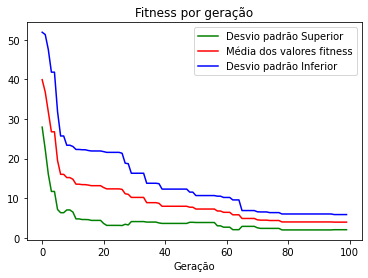

In [28]:
plt.title("Fitness por geração")
plt.xlabel("Geração")
plt.ylabel("")
plt.plot(desvioSup, color = "green", label = "Desvio padrão Superior")
plt.plot(media, color = "red", label = "Média dos valores fitness")
plt.plot(desvioInf, color = "blue", label = "Desvio padrão Inferior")
plt.legend()
plt.show()

[Início](#Índice)

## Segundo caso de teste

In [11]:
palavraAlvo = np.array([
52.547,
72.154,
53.694,
57.771,
115.88,
105.59,
75.368,
126.02,
52.756,
85.100,
80.525,
111.24,
113.62,
64.95,
89.181,
85.647,
101.71,
106.75,
110.37,
72.082,
104.38,
102.41,
63.009,
59.52,
89.869,
126.78,
77.231,
96.821,
67.905,
110.1])

In [12]:
tamanho_2 = palavraAlvo.size
dim_2 = 1

In [13]:
def converter2(palavra):
    lb = min(palavraAlvo)
    ub = max(palavraAlvo)
    novaPalavra =[]
    for i in palavra:
        novaPalavra=np.append(novaPalavra,lb + (ub - lb) * i)
    return novaPalavra

#Funcao fitness
def diferenca(p1,p2):
    diferenca = np.array([])
    for i,j in zip(p1,p2):
        diferenca=np.append(diferenca,((i - j)**2))
    return diferenca

In [14]:
#palavra aleatoria (ja convertida para os limites da palavra alvo)
palavra = [converter2(criaPop(tamanho_2,dim_2))]
palavra

[array([107.8410202 ,  53.43987094,  61.5649328 ,  73.57717174,
         77.40235787,  83.58512455,  95.34230711, 121.07602497,
         57.4593399 ,  87.62183645, 104.01332761,  84.10279534,
        102.29617071,  67.87310772, 104.60533038,  70.19989062,
         65.21095812,  99.6630348 , 107.25352316,  95.58865587,
        106.95452217, 119.73434586,  64.31764169, 126.35533148,
         98.29030556,  55.53612815,  65.97219551,  73.65353453,
        116.70722691,  55.36749517])]

In [15]:
#palavra + fitness
palavra.append(diferenca(palavraAlvo,palavra))
palavra = np.array(palavra).T
palavra

array([[1.07841020e+02, 3.05742867e+03],
       [5.34398709e+01, 7.97218513e-01],
       [6.15649328e+01, 8.13231120e+01],
       [7.35771717e+01, 4.42268123e+02],
       [7.74023579e+01, 6.17788815e+02],
       [8.35851245e+01, 9.63365175e+02],
       [9.53423071e+01, 1.83143831e+03],
       [1.21076025e+02, 4.69622726e+03],
       [5.74593399e+01, 2.41310833e+01],
       [8.76218365e+01, 1.23024415e+03],
       [1.04013328e+02, 2.64878288e+03],
       [8.41027953e+01, 9.95768220e+02],
       [1.02296171e+02, 2.47497999e+03],
       [6.78731077e+01, 2.34889578e+02],
       [1.04605330e+02, 2.71006976e+03],
       [7.01998906e+01, 3.11624547e+02],
       [6.52109581e+01, 1.60375835e+02],
       [9.96630348e+01, 2.21992074e+03],
       [1.07253523e+02, 2.99280368e+03],
       [9.55886559e+01, 1.85258414e+03],
       [1.06954522e+02, 2.96017847e+03],
       [1.19734346e+02, 4.51413944e+03],
       [6.43176417e+01, 1.38548006e+02],
       [1.26355331e+02, 5.44766980e+03],
       [9.829030

In [16]:
#ordenar
palavra_ord = palavra[palavra[0:, -1].argsort()]
#50% melhores
melhor_palavra_inicial = palavra_ord[0:int(tamanho_2/2),:]
melhor_palavra_inicial

array([[5.34398709e+01, 7.97218513e-01],
       [5.53674952e+01, 7.95519302e+00],
       [5.55361282e+01, 8.93488711e+00],
       [5.74593399e+01, 2.41310833e+01],
       [6.15649328e+01, 8.13231120e+01],
       [6.43176417e+01, 1.38548006e+02],
       [6.52109581e+01, 1.60375835e+02],
       [6.59721955e+01, 1.80235875e+02],
       [6.78731077e+01, 2.34889578e+02],
       [7.01998906e+01, 3.11624547e+02],
       [7.35771717e+01, 4.42268123e+02],
       [7.36535345e+01, 4.45485800e+02],
       [7.74023579e+01, 6.17788815e+02],
       [8.35851245e+01, 9.63365175e+02],
       [8.41027953e+01, 9.95768220e+02]])

In [17]:
#contagem de geração estagnada
cont = 0
delta = 0.01
sem_evoluir = 100
i_desejadas = 10

In [18]:
#funcao random walk
#parametros: melhor_pop_inicial, n_pop, dim, converter, funcao fitness, tabela
#problema: funcao fitness

In [19]:
tabela2 = pd.DataFrame()
for j in range(i_desejadas):

    melhor_i=[]

    for i in range(sem_evoluir):
        #segunda geracao
        if i==0:
            nova_melhor_pop = melhor_palavra_inicial.copy() #troca melhor_pop_inicial

            #novos 50% da população
            nova_pop = criaPop(int(tamanho_2/2),dim_2) #troca n_pop, dim

            #converter para as faixas
            nova_pop = converter2(nova_pop) #troca converter1

            #fitness da nova população
            nova_pop = np.c_[nova_pop,(diferenca(palavraAlvo,nova_pop))] #troca f

            #melhor 50% pop anterior + 50% nova população
            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            #reordena
            melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()] 

            #melhor fit dessa geração
            melhor_i.append(melhor_pop[0:1,-1])
            
        #gerações posteriores
        elif i>0:
            nova_melhor_pop = melhor_pop[0:int(n_pop/2),:]

            nova_pop = criaPop(int(tamanho_2/2),dim_2) #troca n_pop, dim

            nova_pop = converter2(nova_pop) #troca converter1

            nova_pop = np.c_[nova_pop,(diferenca(palavraAlvo,nova_pop))] #troca f

            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()]

            #melhores fits da geração
            melhor_i.append(melhor_pop[0:1,-1])

            evolucao = estagnacao(melhor_i[i-1],melhor_i[i])

            if evolucao <= delta:
                cont += 1

            elif evolucao >= delta:
                cont=0

            elif evolucao == cont:
                continue

    tabela2 = pd.concat([tabela2, pd.DataFrame(melhor_i)], axis=1) #troca tabela
    #print('Número de iterações para a convergência: ',i)

#media e desvio padrao dos fits
desvioP = np.std(tabela2,axis=1)
media = np.mean(tabela2,axis=1)
desvioSup = media - desvioP
desvioInf = media + desvioP


tabela2

,0,0,0,0,0,0,0,0,0,0
0,0.797219,0.797219,0.797219,0.797219,0.017088,0.665287,0.000558,0.797219,0.797219,0.797219
1,0.797219,0.027818,0.797219,0.797219,0.017088,0.665287,0.000558,0.797219,0.797219,0.797219
2,0.797219,0.027818,0.797219,0.797219,0.017088,0.665287,0.000558,0.797219,0.797219,0.797219
3,0.088514,0.027818,0.797219,0.797219,0.017088,0.665287,0.000558,0.258954,0.797219,0.797219
4,0.088514,0.027818,0.797219,0.000222,0.017088,0.665287,0.000558,0.258954,0.000018,0.797219
...,...,...,...,...,...,...,...,...,...,...
95,0.000016,0.000436,0.004275,0.000127,0.000013,0.008671,0.000558,0.002951,0.000018,0.000066
96,0.000016,0.000436,0.004275,0.000127,0.000013,0.008671,0.000558,0.002951,0.000018,0.000066
97,0.000016,0.000436,0.004275,0.000127,0.000013,0.008671,0.000558,0.002951,0.000018,0.000066
98,0.000016,0.000436,0.004275,0.000127,0.000013,0.008671,0.000558,0.002951,0.000018,0.000066


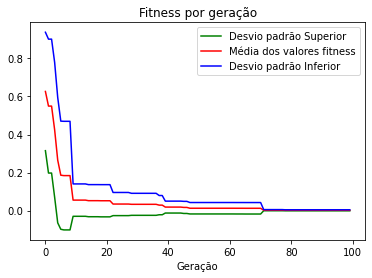

In [21]:
plt.title("Fitness por geração")
plt.xlabel("Geração")
plt.ylabel("")
plt.plot(desvioSup, color = "green", label = "Desvio padrão Superior")
plt.plot(media, color = "red", label = "Média dos valores fitness")
plt.plot(desvioInf, color = "blue", label = "Desvio padrão Inferior")
plt.legend()
plt.show()

[Início](#Índice)<br>

## Terceiro caso de teste

In [22]:
#função rastrigin
def rastrigin(x):
    return 10 * len(x) + sum(i * i - 10 * cos(2 * pi * i) for i in x)